In [2]:
import pandas as pd

data = pd.read_csv('goldstock.csv')
data

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...,...
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


In [4]:
data.shape

(2511, 7)

In [6]:
data.isnull().sum()

Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [15]:
data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

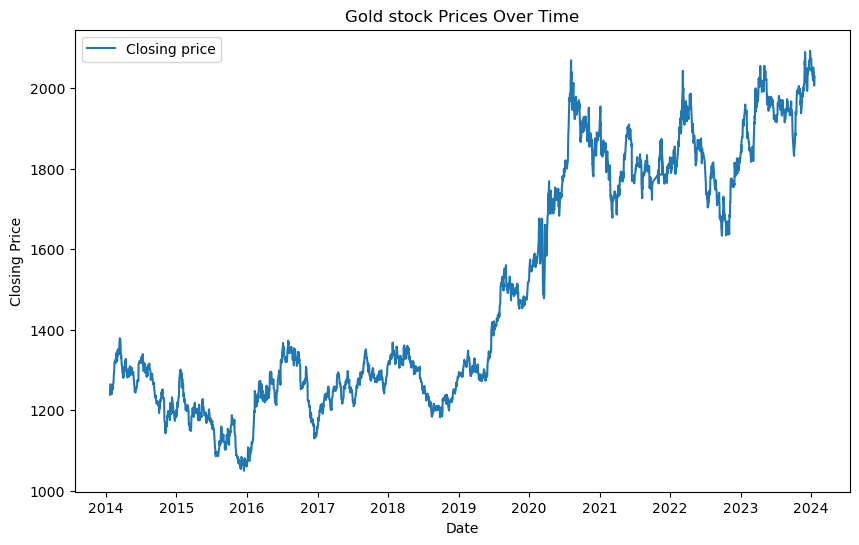

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Closing price')
plt.title('Gold stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [18]:
data['daily_return'] = data['Close'].pct_change()
data['daily_return']

Date
2024-01-19         NaN
2024-01-18   -0.003794
2024-01-17   -0.007469
2024-01-16    0.011812
2024-01-12    0.010541
                ...   
2014-01-28   -0.009270
2014-01-27    0.010396
2014-01-24    0.000791
2014-01-23   -0.001582
2014-01-22   -0.018931
Name: daily_return, Length: 2511, dtype: float64

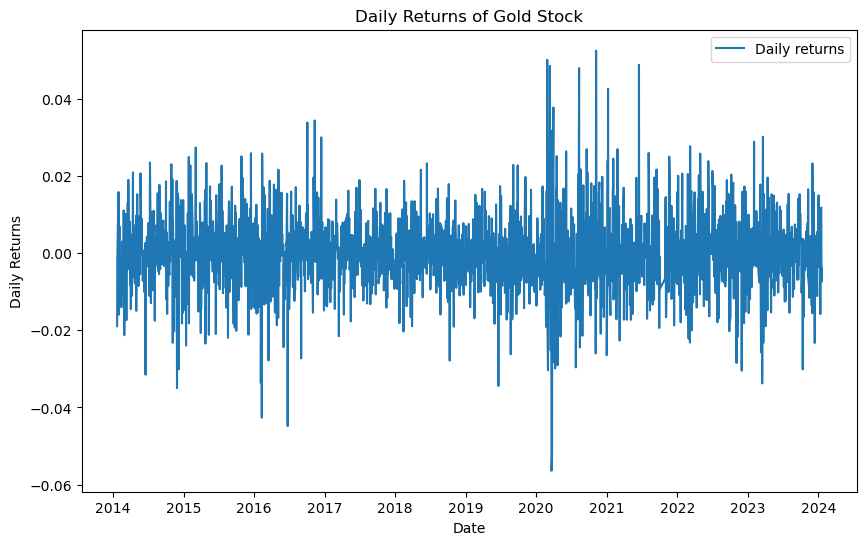

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(data['daily_return'], label='Daily returns')
plt.title('Daily Returns of Gold Stock')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

In [22]:
# Descriptive Statistics
print(data[['Close', 'Volume']].describe())

             Close         Volume
count  2511.000000    2511.000000
mean   1498.726085  185970.770609
std     298.824811   97600.769382
min    1049.600000       1.000000
25%    1249.850000  126693.500000
50%    1332.800000  175421.000000
75%    1805.850000  234832.000000
max    2093.100000  787217.000000


In [24]:
# Correlation Analysis
Correlation_matrix = data[['Close', 'Volume', 'Open', 'High', 'Low']].corr()
print(Correlation_matrix)

           Close    Volume      Open      High       Low
Close   1.000000  0.022835  0.998994  0.999524  0.999576
Volume  0.022835  1.000000  0.027012  0.030871  0.018274
Open    0.998994  0.027012  1.000000  0.999459  0.999386
High    0.999524  0.030871  0.999459  1.000000  0.999251
Low     0.999576  0.018274  0.999386  0.999251  1.000000


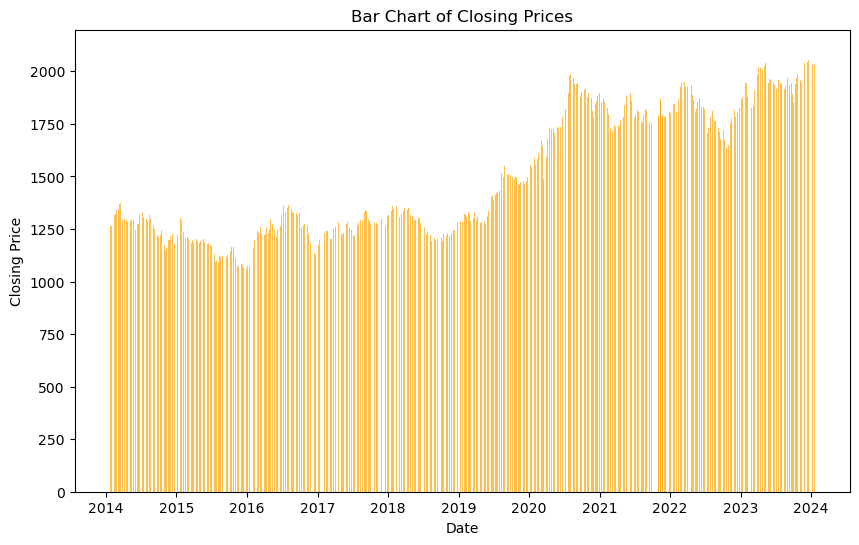

In [32]:
# Bar chart for Closing Prices
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['Close'], color='orange', alpha=0.7)
plt.title('Bar Chart of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

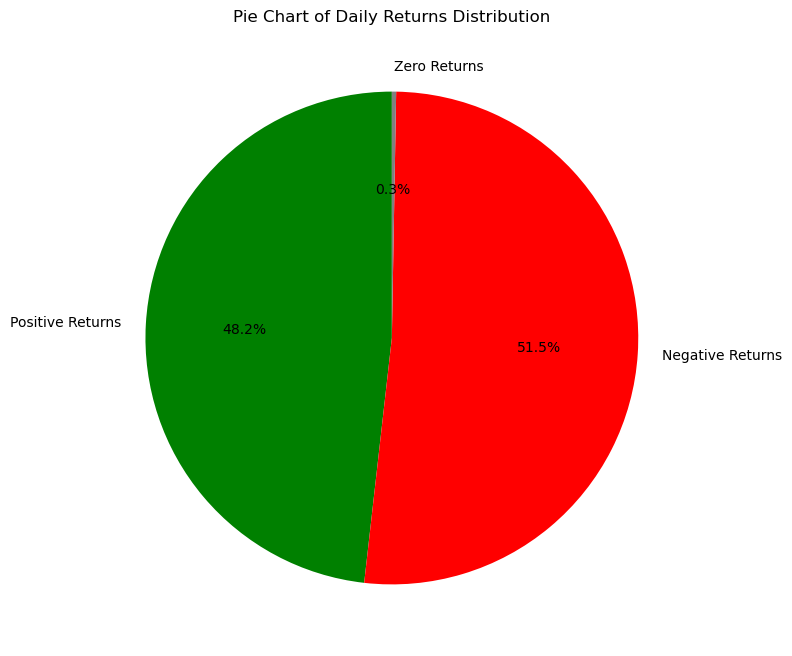

In [28]:
# Pie chart for Daily Returns
positive_returns = data[data['daily_return'] > 0]['daily_return'].count()
negative_returns = data[data['daily_return'] < 0]['daily_return'].count()
zero_returns = data['daily_return'].count() - positive_returns - negative_returns

labels = ['Positive Returns', 'Negative Returns', 'Zero Returns']
sizes = [positive_returns, negative_returns, zero_returns]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'gray'])
plt.title('Pie Chart of Daily Returns Distribution')
plt.show()

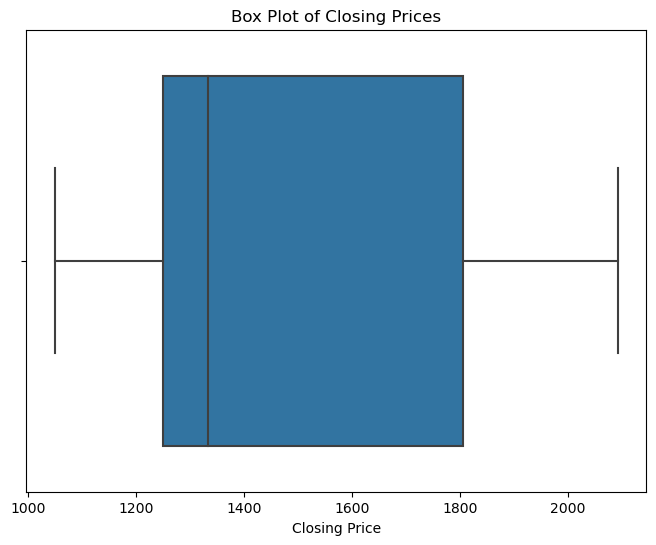

In [30]:
import seaborn as sns

# Box plot for Closing Prices
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Close'])
plt.title('Box Plot of Closing Prices')
plt.xlabel('Closing Price')
plt.show()

In [31]:
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Close'] < lower_bound) | (data['Close'] > upper_bound)]
print("Potential Outliers:")
print(outliers)

Potential Outliers:
Empty DataFrame
Columns: [Unnamed: 0, Close, Volume, Open, High, Low, daily_return]
Index: []
